## plot numerical data

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
current_dir = os.getcwd()  # 現在の作業ディレクトリを取得
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
import src.read as read
import src.utils as util

In [89]:
file_names = []
header1 = "global_1.0d-3/"
header2 = "local_1.0d-3/"
header3 = "local_1.0d-3_two_level/"
directory = "u_error/"
pattern = "u_error*.dat"

result = read.get_filenames_list_exp(header1+directory, pattern)
file_names1 = result[0][:-2]
result = read.get_filenames_list_exp(header2+directory, pattern)
file_names2 = result[0][:-2]
result = read.get_filenames_list_exp(header3+directory, pattern)
file_names3 = result[0]
n_files = result[1]

print(file_names3)

['u_error1.dat', 'u_error2.dat', 'u_error4.dat', 'u_error8.dat', 'u_error16.dat', 'u_error32.dat']


In [90]:
array1 = read.read_files(header1+directory, file_names1)
array2 = read.read_files(header2+directory, file_names2)
array3 = read.read_files(header3+directory, file_names3)

print(f"2次元配列の形状: {array1.shape}")

2次元配列の形状: (6, 100)


In [91]:
mean_HROM1 = []
mean_HROM2 = []
mean_HROM3 = []
n_means = array1.shape[0]
n_data = array1.shape[1]
tr = range(30, n_data)
mean_HROM1 = util.get_mean(array1, n_means, target_dim=1, custom_flag=True, target_range=tr)
mean_HROM2 = util.get_mean(array2, n_means, target_dim=1, custom_flag=True, target_range=tr)
mean_HROM3 = util.get_mean(array3, n_means, target_dim=1, custom_flag=True, target_range=tr)

print(mean_HROM2)
print(len(mean_HROM2))

[np.float64(0.00011127148059217252), np.float64(0.00011367317392922548), np.float64(0.00011870436546527152), np.float64(0.00017510359661965659), np.float64(0.00018453561759425863), np.float64(0.0001638371292616779)]
6


#### グロバールな残差判定（CMD発表時の提案手法）

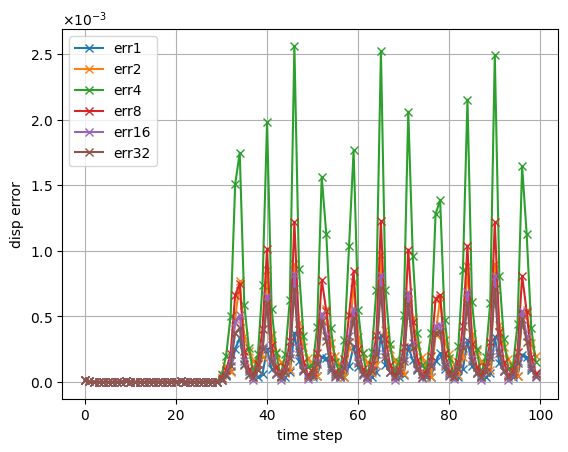

In [92]:
array1 = array1.T
fig_3, ax_3 = plt.subplots()
data_names = []

for i in range(1,(n_files+1),1):
    incr = 2**(i-1)
    data_names.append(f'err{incr}')

for i in range(0, n_files, 1):
    ax_3.plot(array1[:,i], marker='x', label=data_names[i])

ax_3.set_xlabel('time step')
ax_3.set_ylabel('disp error')
ax_3.legend(data_names)
ax_3.grid()
# ax_3.set_ylim(0.0, 0.001)
ax_3.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)

plt.show()

#### バランシングしたローカルな残差収束判定（提案手法、Farhatの手法）

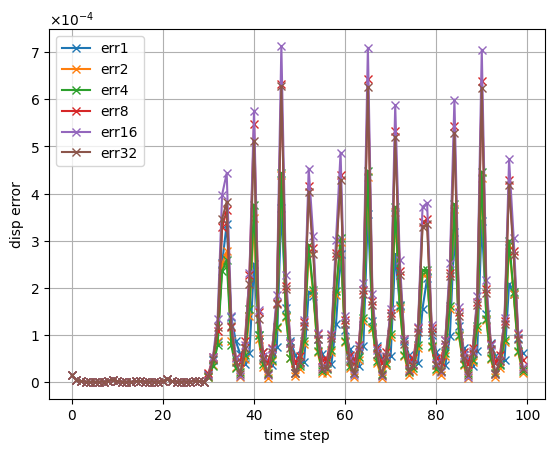

In [93]:
array2 = array2.T
fig_3, ax_3 = plt.subplots()
data_names = []

for i in range(1,(n_files+1),1):
    incr = 2**(i-1)
    data_names.append(f'err{incr}')

for i in range(0, n_files, 1):
    ax_3.plot(array2[:,i], marker='x', label=data_names[i])

ax_3.set_xlabel('time step')
ax_3.set_ylabel('disp error')
ax_3.legend(data_names)
ax_3.grid()
# ax_3.set_ylim(0.0, 0.001)
ax_3.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)

plt.show()

#### バランシングした残差判定（Farhatの手法）で２段階のNNLSを実行した手法

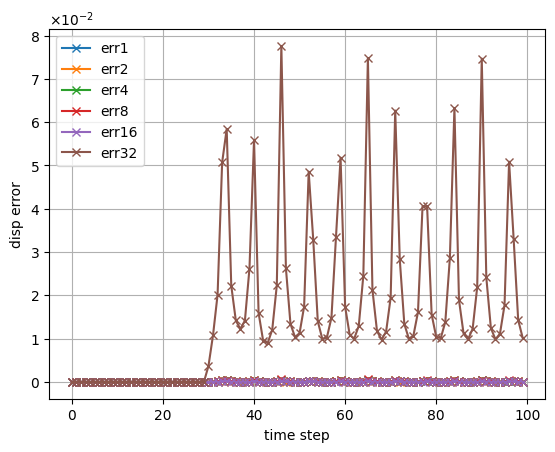

In [94]:
array3 = array3.T
fig_3, ax_3 = plt.subplots()
data_names = []

for i in range(1,(n_files+1),1):
    incr = 2**(i-1)
    data_names.append(f'err{incr}')

for i in range(0, n_files, 1):
    ax_3.plot(array3[:,i], marker='x', label=data_names[i])

ax_3.set_xlabel('time step')
ax_3.set_ylabel('disp error')
ax_3.legend(data_names)
ax_3.grid()
# ax_3.set_ylim(0.0, 0.001)
ax_3.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)

plt.show()

#### 各３手法を並列数ごとに精度の平均をとって同一の図にプロット

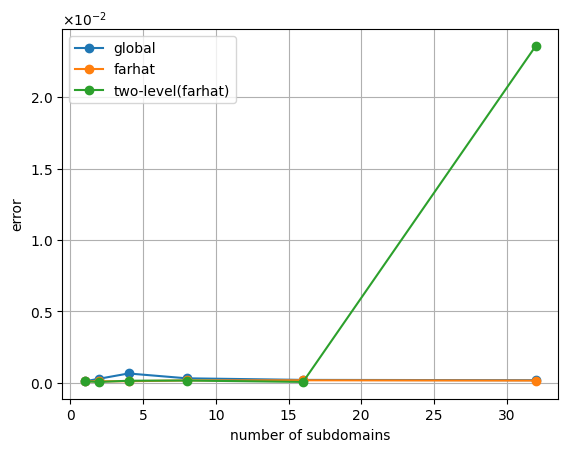

In [95]:
fig, ax = plt.subplots()
x = np.zeros(n_files)
for i in range(0,n_files,1):
    x[i] = 2**i

ax.plot(x, mean_HROM1, marker='o')
ax.plot(x, mean_HROM2, marker='o')
ax.plot(x, mean_HROM3, marker='o')
ax.set_xlabel('number of subdomains')
ax.set_ylabel('error')
ax.grid()
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
ax.legend(['global', 'farhat', 'two-level(farhat)'])
# ax.set_xscale('log')
# ax.set_xticks(mean_HROM1)
# ax.set_xticklabels([2**i for i in range(0,len(mean_HROM1))])
# ax.set_title('disp error')
plt.show()

外れ値のせいで詳細がわからないので、並列数１６までで以下でグラフ化

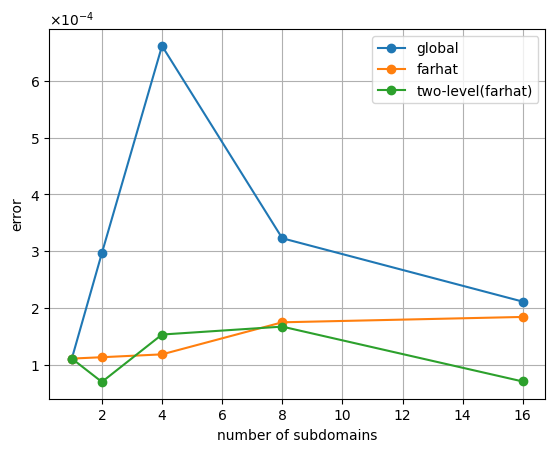

In [96]:
fig, ax = plt.subplots()
x = np.zeros(n_files-1)
for i in range(0,n_files-1,1):
    x[i] = 2**i

mean_HROM1.pop()
mean_HROM2.pop()
mean_HROM3.pop()

ax.plot(x, mean_HROM1, marker='o')
ax.plot(x, mean_HROM2, marker='o')
ax.plot(x, mean_HROM3, marker='o')
ax.set_xlabel('number of subdomains')
ax.set_ylabel('error')
ax.grid()
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
ax.legend(['global', 'farhat', 'two-level(farhat)'])
# ax.set_xscale('log')
# ax.set_xticks(mean_HROM1)
# ax.set_xticklabels([2**i for i in range(0,len(mean_HROM1))])
# ax.set_title('disp error')
plt.show()

# select elements of resuced mesh
選定要素数のプロット

read text file of select elements

In [97]:
file_name = 'select_elements.dat'
data1 = []
data2 = []
data3 = []

with open('../numerical_data/'+header1+file_name, 'r')as file:
    data1 = file.read()

with open('../numerical_data/'+header2+file_name, 'r')as file:
    data2 = file.read()

with open('../numerical_data/'+header3+file_name, 'r')as file:
    data3 = file.read()

print(data1)
data1 = data1.splitlines()
data2 = data2.splitlines()
data3 = data3.splitlines()
select_e1 = np.array(data1, dtype=int)
select_e2 = np.array(data2, dtype=int)
select_e3 = np.array(data3, dtype=int)
print(select_e1)


9
12
16
31
48
95
[ 9 12 16 31 48 95]


plot select elements data

[ 9 12 16 31 48 95]


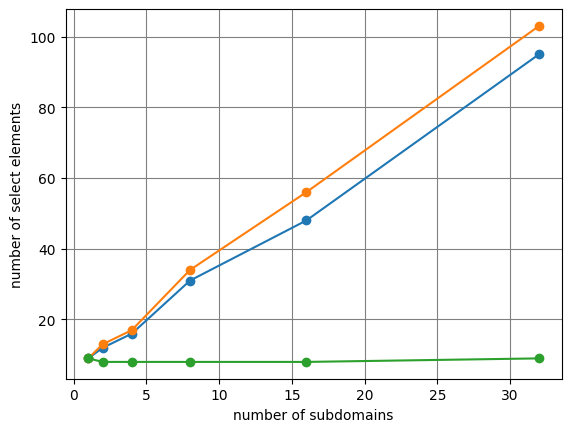

In [98]:
# select_e = np.delete(select_e, -1)
print(select_e1)
x = np.zeros(n_files)
for i in range(0,n_files,1):
    x[i] = 2**i

fig2, ax2 = plt.subplots()
ax2.plot(x, select_e1, marker='o')
ax2.plot(x, select_e2, marker='o')
ax2.plot(x, select_e3, marker='o')
ax2.set_xlabel('number of subdomains')
ax2.set_ylabel('number of select elements')
# ax2.set_xscale('log')
# ax2.set_yscale('log')
ax2.grid(which='major',color='gray',linestyle='-')
ax2.grid(which='minor',color='gray',linestyle='--')
plt.show()